## BUISNESS CASE: BASED ON GIVEN FEATURE WE NEED TO PREDICT SYMBOLING OF CAR

In [1]:
## Importing the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')
import sweetviz as sv

In [2]:
data = pd.read_excel('imports-85.xlsx')

In [3]:
pd.set_option('display.max_columns',None)


In [4]:
### Basic cheack
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3.0,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,four,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,3.0,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,four,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,1.0,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823.0,ohcv,six,152.0,mpfi,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,2.0,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337.0,ohc,four,109.0,mpfi,3.19,3.4,10.0,102.0,5500.0,24.0,30.0,13950.0
4,2.0,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824.0,ohc,five,136.0,mpfi,3.19,3.4,8.0,115.0,5500.0,18.0,22.0,17450.0


In [5]:
data.tail()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
200,-1.0,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952.0,ohc,four,141.0,mpfi,3.78,3.15,9.5,114.0,5400.0,23.0,28.0,16845.0
201,-1.0,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049.0,ohc,four,141.0,mpfi,3.78,3.15,8.7,160.0,5300.0,19.0,25.0,19045.0
202,-1.0,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012.0,ohcv,six,173.0,mpfi,3.58,2.87,8.8,134.0,5500.0,18.0,23.0,21485.0
203,-1.0,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217.0,ohc,six,145.0,idi,3.01,3.4,23.0,106.0,4800.0,26.0,27.0,22470.0
204,-1.0,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3062.0,ohc,four,141.0,mpfi,3.78,3.15,9.5,114.0,5400.0,19.0,25.0,22625.0


In [6]:
data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [7]:
data.shape

(205, 26)

* Total 205 observation with 26 feature

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    float64
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    float64
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

* It cleary seen the some special charcter in data

In [9]:
## special chracter converted into NAN value
data.replace('?',np.nan,inplace=True)

In [10]:
data.head() 

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3.0,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,four,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,3.0,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,four,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,1.0,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823.0,ohcv,six,152.0,mpfi,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,2.0,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337.0,ohc,four,109.0,mpfi,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,2.0,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824.0,ohc,five,136.0,mpfi,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


### Examine the data

In [11]:
data.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


* No corrupte data in dataset.

### Different features information
* symboling:- Symboling corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale.

* normalized-losses:- The relative average loss per payment per insured vehicle year.The value is normalized for all autos within a particular size classification(Two doors,sport espacility)

* make:- A car's make is the brand of the vehicle, while the model refers to the name of a car product and sometimes a range of products. For example, Toyota is a car make and Camry is a car model. The make, model, model year, body style and trim level all have implications on the cost of a vehicle and its insurance rates.

* fuel-type:- Gas is the most commonly used fuel for most car-types. With it being readily available & Diesel fuel can be used specifically with diesel engines.

* aspiration:- A naturally aspirated engine, sometimes known as a normally aspirated engine, is an internal combustion engine in which oxygen intake depends solely on atmospheric pressure and does not rely on forced induction through a turbocharger or a supercharger. 

* num-of-doors:- Numbers of doors in cars(Two,Four)

* body-style :- The body style of a car refers to the shape and model of a particular automobile.

* drive-wheels:- A drive wheel is a wheel of a motor vehicle that transmits force, transforming torque into tractive force from the tires to the road, causing the vehicle to move. The powertrain delivers enough torque to the wheel to overcome stationary forces, resulting in the vehicle moving forwards or backwards.

* engine-location:- The engine is placed in front of the rear axle to achieve the best possible weight distribution. Because of the optimum weight distribution and the weight of the engine towards the rear axle, it provides additional traction to the tyres.

* wheel-base :- The wheelbase is the distance between the centers of the front and rear wheels.

* length:- The average car length is about 15 to 16 feet (4.2 to 4.9 meters).

* width:- width ranges from 1735-1992mm.

* height :-ranges from 1116-1475mm.

* curb-weight:-The curb weight of your vehicle is the weight of the car with all of the standard equipment and amenities, but without any passengers.[1488 to 4066]

* engine-type:- Their are differnt types of engine used in cars.

* num-of-cylinders:- Most cars have four, six, or eight cylinders. If the car has four cylinders, called the straight-four engine, all of its cylinders are designed to be in a straight line. This configuration is common to cars that have a 2.4-liter engine displacement. An engine of a car with six cylinders is called a V6 engine.

* Engine size:- Engine size is the volume of fuel and air that can be pushed through a car’s cylinders and is measured in cubic centimetres (cc). Car engine sizes are normally specified in litres, which is rounded up to the nearest tenth of a litre. For example, a car that has a 1390cc engine would be described as a 1.4 litre.

* fuel-system:- The car fuel system is comprised of several different components to make this entire process happen smoothly. There is a fuel pump, fuel tank, fuel lines, fuel filter, fuel injectors, and carburetor.
 
* bore:- Bore is the diameter of the cylinder where the fuel and air comes into contact to combust which in turn forces the piston to move.

* stroke:- Stroke (engine) In the context of an Internal combustion engine, the term stroke has the following related meanings: A phase of the engine's cycle (e.g. compression stroke, exhaust stroke)

* compression-ratio:- The compression ratio is exactly that, a ratio. Specifically, it’s the ratio between the maximum and minimum cylinder volume when the piston is at the bottom and top of its stroke respectively.compression ratios have typically been between 8∶1 and 12∶1

* horsepower:-Indicates the power produce by cars engine. high power sent to the wheel.the range of horsepower between[48,288]

* PEAK RPM-  RPM stands for revolutions per minute, and it's used as a measure of how fast any machine is operating at a given time. In cars, rpm measures how many times the engine's crankshaft makes one full rotation every minute, and along with it, how many times each piston goes up and down in its cylinder[4150, 6600]

* city-mpg:- City mpg generally is the lowest mpg rating for a vehicle primarily because of the frequent starting, stopping and idling

* highway-mpg:- Highway mpg typically is the highest because uninterrupted driving tends to burn less fuel.[16,54]

* price:- The price is depend on all above parameters.



### Explotary Data Analysis

#### Univariate Analysis

In [12]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3.0,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,four,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,3.0,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,four,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,1.0,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823.0,ohcv,six,152.0,mpfi,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,2.0,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337.0,ohc,four,109.0,mpfi,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,2.0,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824.0,ohc,five,136.0,mpfi,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


In [13]:
## analysis on continous veriable
data1 = data[['symboling','wheel-base','length','width','height','curb-weight',
              'engine-size','compression-ratio','highway-mpg',
              'normalized-losses','bore','stroke','horsepower','peak-rpm','make','price']]

In [14]:
import sweetviz as sv
new_report = sv.analyze(data1)
new_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


##### Observation:-
* Symboling :- The range of symboling is [0-3].
* Wheel-base :- Most of the wheel base between [95-105].
* Length :- Maximum length of car is 208.0 and minimum length of car is 141.0,Most of the cars length range between 160 to 185.
* Width :- Most of the width of cars range from 63 to 67.5,The minimum width 60.3 and 72.3 maximum width of cars.
* height :- The maximum cars height between 51.5 to 56.5
* Curb-weight :- The average weight of cars 2556,maximum curb-weight is 4066 & minimum curb-weight is 1488.
* Engine-size :- The average size of engine is 127.
* Compression-ratio :- Most of the cars compression ratio between 7.0 to 10.1 and maximum compression ration is 23.0
* City-mpg :- Most of the cars city-mpg range between 20 to 35 and 49 is maximum city-mpg.
* Highway-mpg:- The average highway-mpg is 30.8 & most of the car gives highway-mpg between 25 to 40 and highest highway-mapg is 54.0
* Normalized-losses:- normalized-losses range between 65 to 256 with average of 122.
* Bore:- Most of the diameter of cylider between 3 to 3.75
* Stroke:- The maximum stroke of engine 4.17 & minimum stroke of engine 2.07.
* Horsepower:- Most of the cars horsepower range between 50 to 150 and maximum horsepower is 288 & minimum horsepower is 48.
* Peak-rpm:- The range of peak-rpm is 6600 to 4150
* Make:- Toyota,nissan and mazda has been make more brands.
* price:- The price range between 5,118 to 45,400.

### Bivariate Analysis

In [15]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3.0,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,four,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,3.0,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,four,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,1.0,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823.0,ohcv,six,152.0,mpfi,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,2.0,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337.0,ohc,four,109.0,mpfi,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,2.0,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824.0,ohc,five,136.0,mpfi,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


In [16]:
## analysis on continous veriable
data2 = data[['wheel-base','length','width','height','curb-weight',
              'engine-size','compression-ratio','city-mpg','highway-mpg',
              'normalized-losses','bore','stroke','horsepower','peak-rpm','price']]

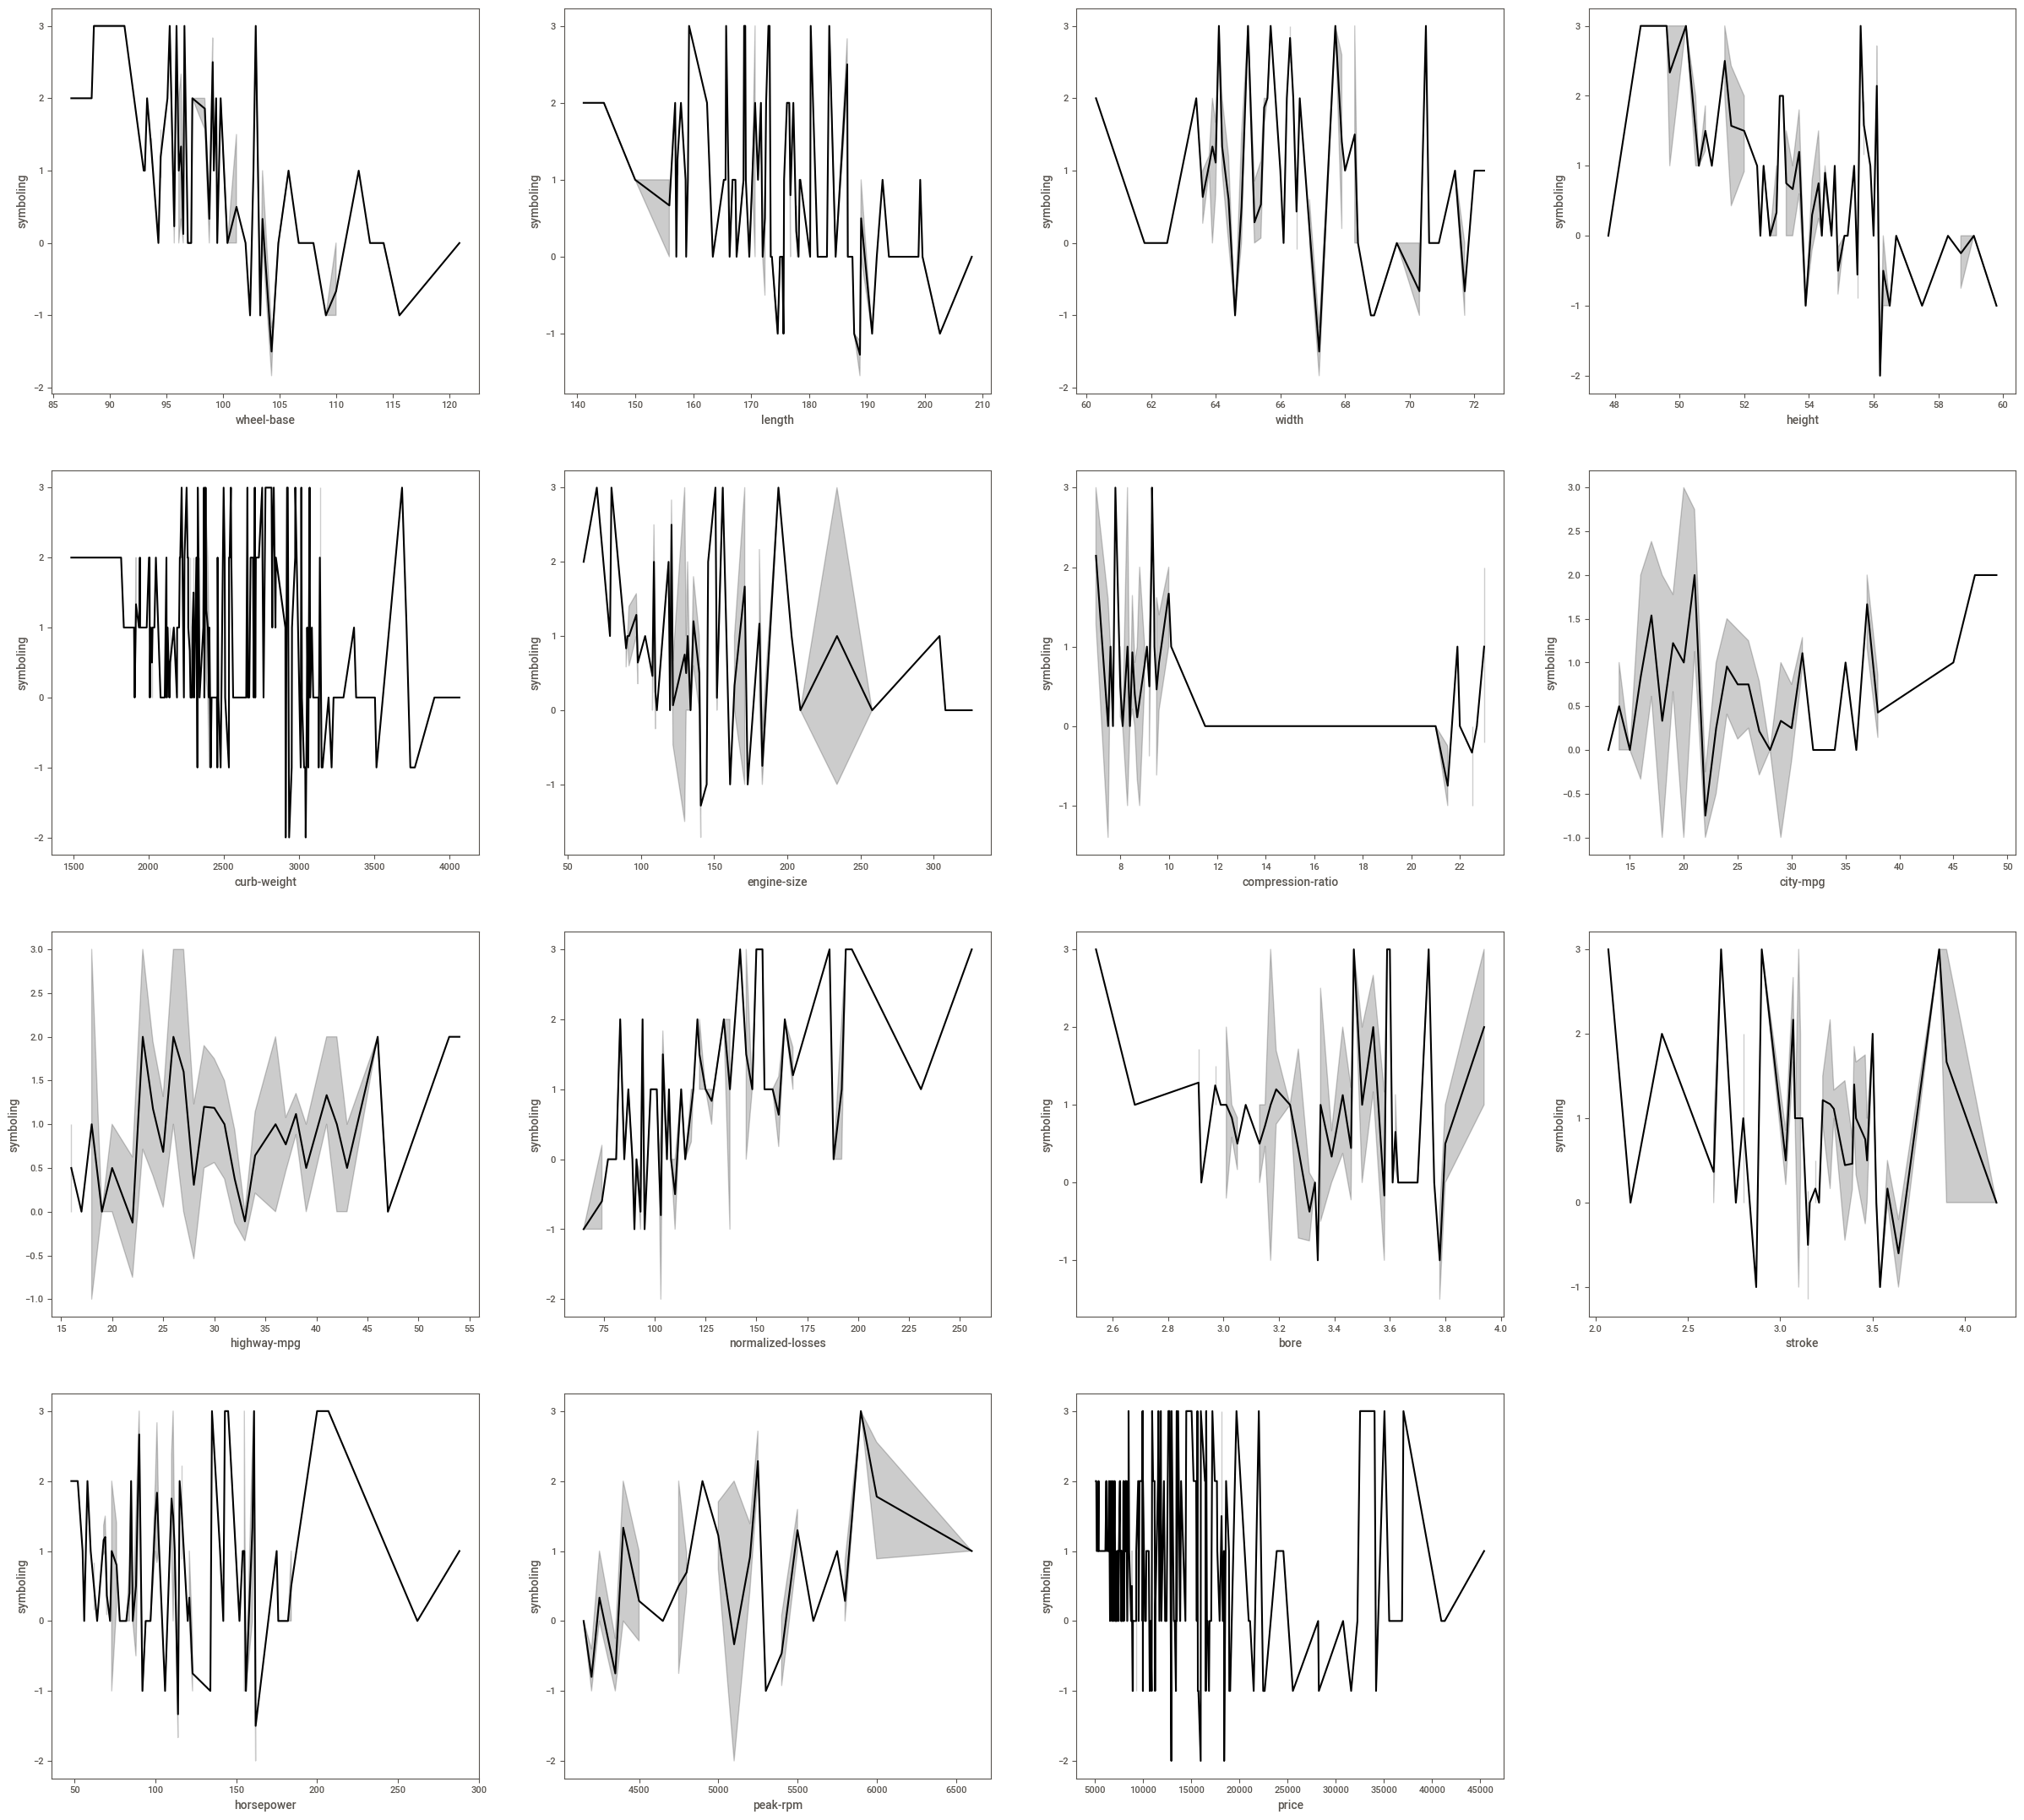

In [13]:
plt.figure(figsize=(30,35),facecolor='white')
plotno = 1 ## counter

for column in data2:
    if plotno<=20: ## acessing the column
        plt.subplot(5,4,plotno) 
        sns.lineplot(x=data[column],y='symboling',data=data,color='black')
        plotno+=1 ## counter increment

#### Observation:- 
* In all feature data are overlapped & not follow any trend.

In [14]:
data3 = data[['fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location',
             'engine-type','num-of-cylinders','fuel-system']]

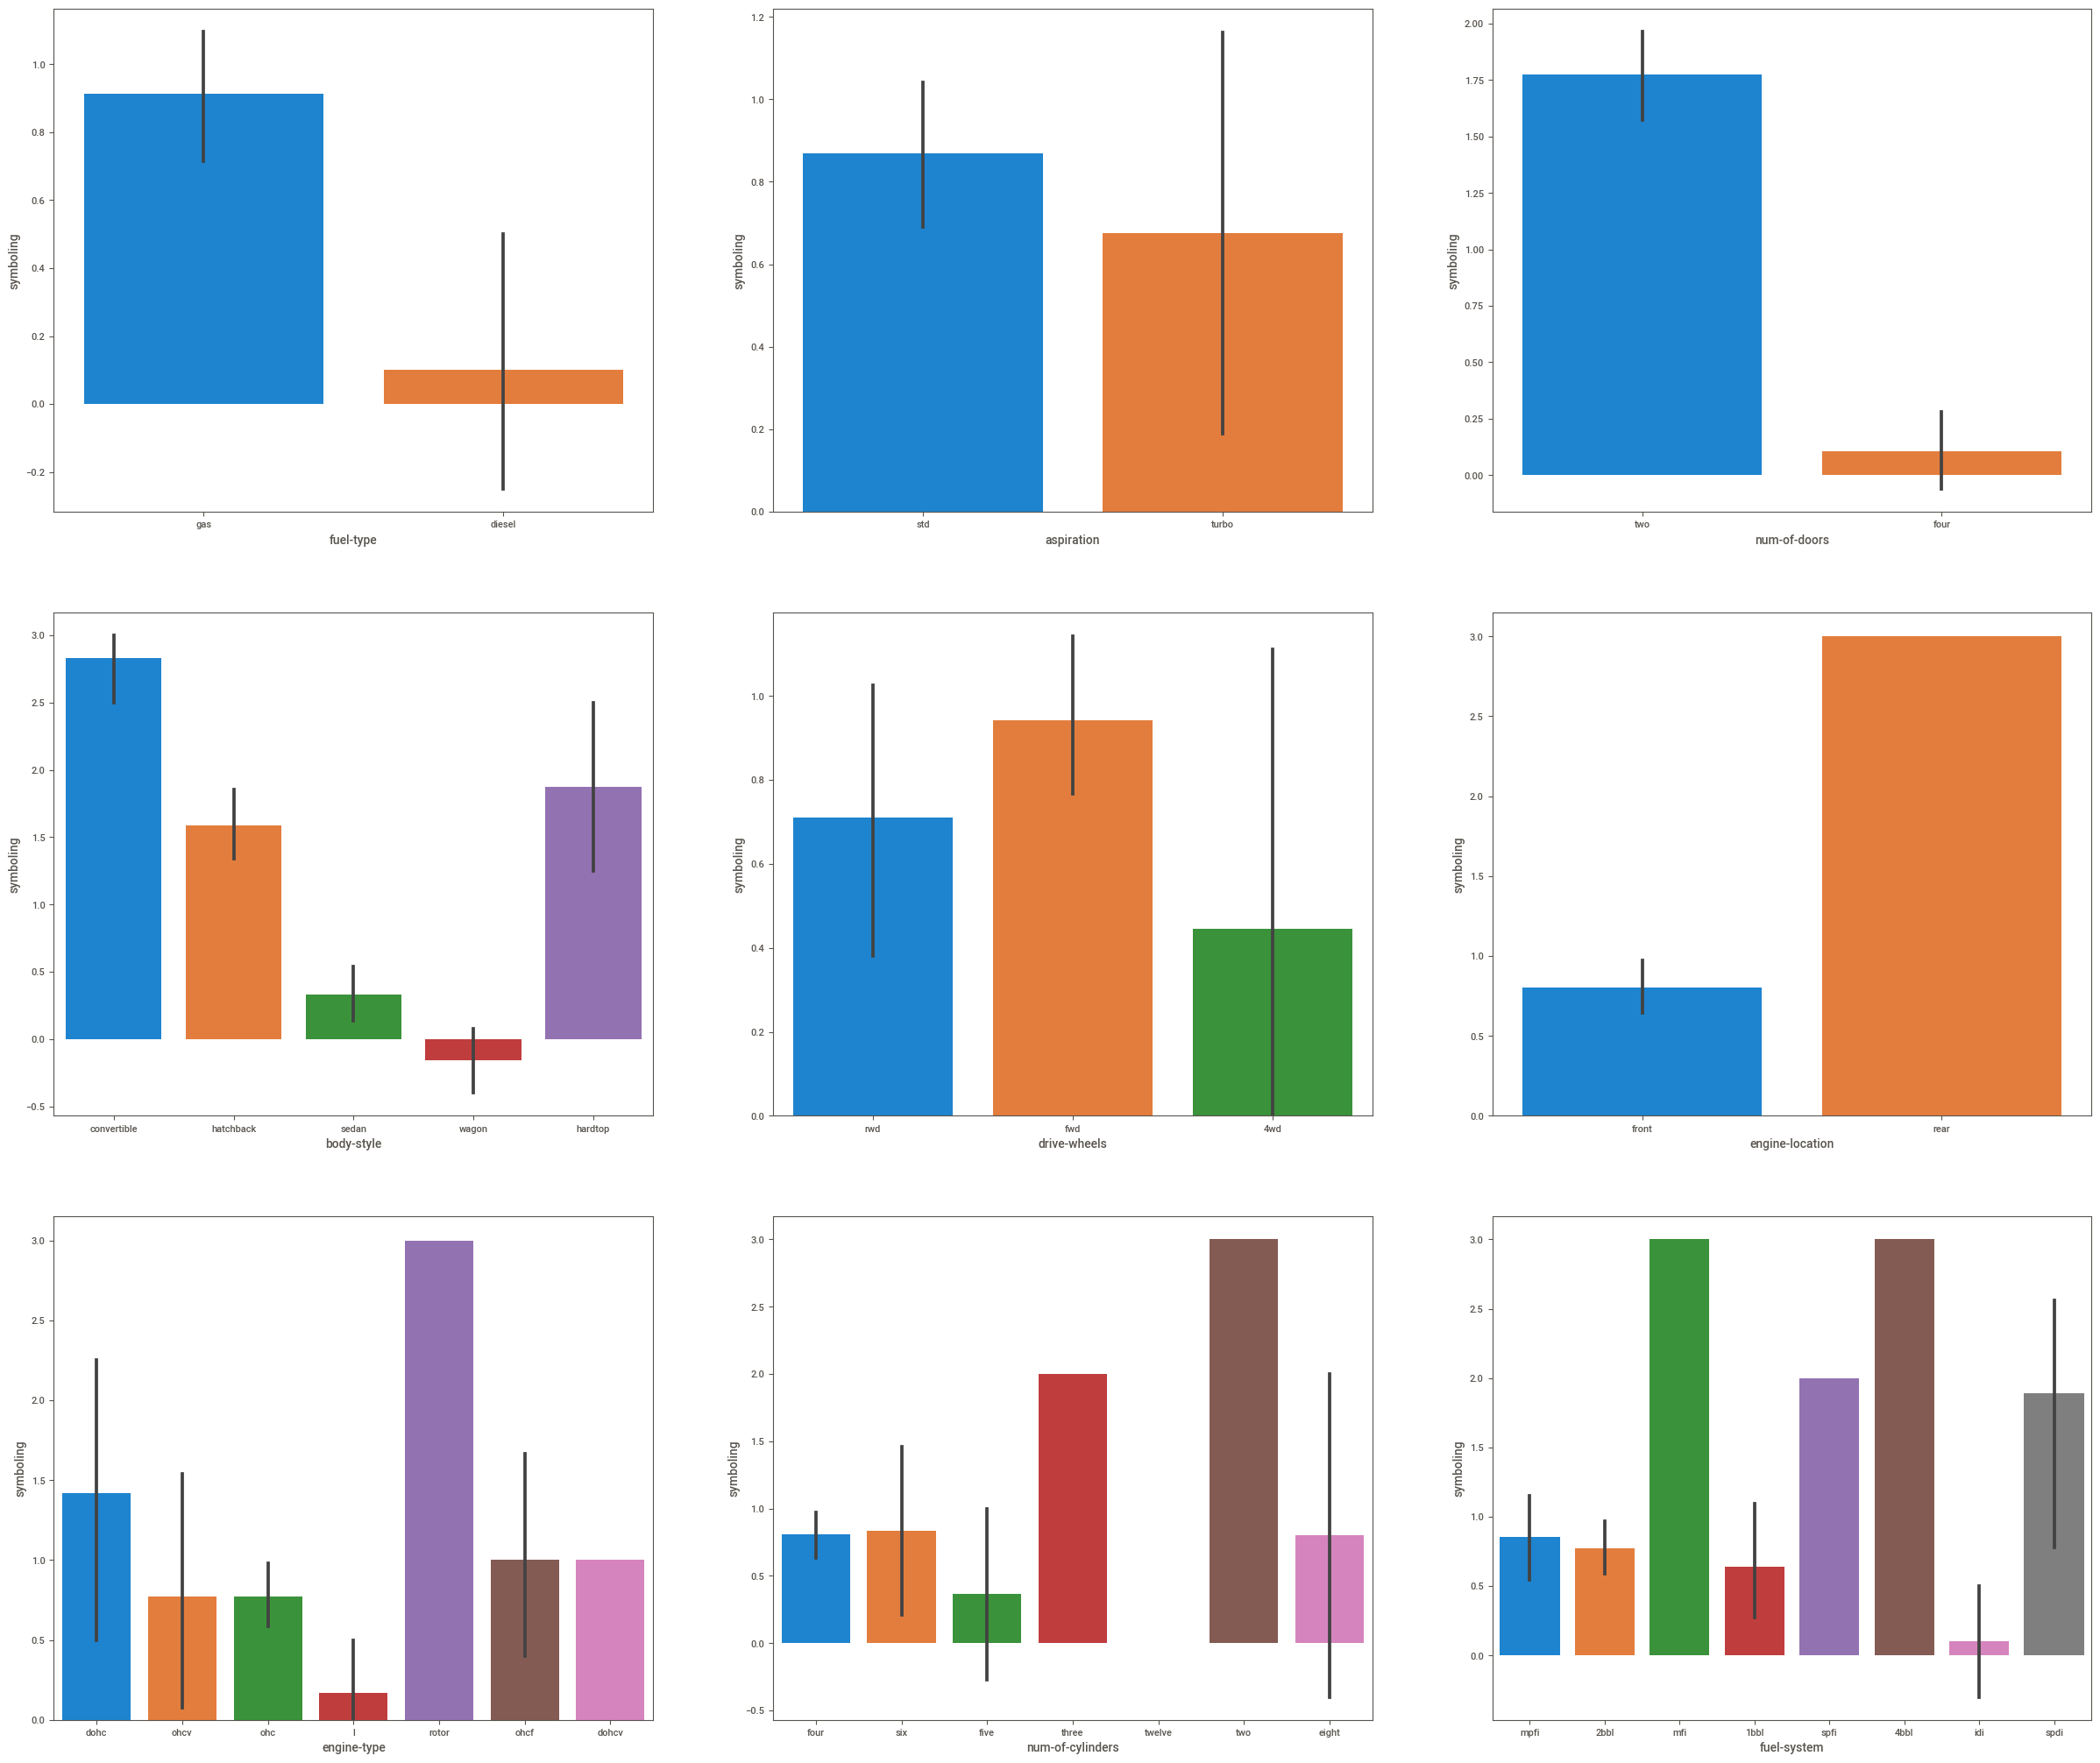

In [15]:
plt.figure(figsize=(30,35),facecolor='white')
plotno = 1 ## counter

for column in data3:
    if plotno<=20: ## acessing the column
        plt.subplot(4,3,plotno) 
        sns.barplot(x=data3[column],y='symboling',data=data)
        plotno+=1 ## counter increment

##### Observation:-
* fuel-type:- Gas fuel car more risky & 50-50% chance of risk with diesel in cars. 
* aspiration:- Turbo aspiration engine more risk than std engine.
* num-of-doors:- Two doors cars more risky than Four doors car.
* body-style:- Wagon body-style more safe cars than convertible,hatchback,sedan, and hardtop.
* wheel-drive:- rwd,fwd & 4wd all wheel-drive are risky.
* engine-location:- rare engine more risk than front.
* engine-type:- roter car engine more risk and other 50-50% chance of risk.
* num-of-cylinders:- five & eight cylinder car has less risk than others.
* fuel-system:- idl fuel-system cars has safe and mfl,4bbl,spfi fuel-system cars more risky.
    

In [16]:
list_to_replace = ['mitsubishi','honda','volkswagen','subaru','peugot','volvo','dodge','mercedes-benz',
                  'bmw','audi','plymouth','saab','porsche','isuzu','jaguar','chevrolet','alfa-romero','renault','mercury']

In [17]:
data.make = data.make.replace(list_to_replace,'Other')

In [18]:
data.make.value_counts()

Other     138
toyota     32
nissan     18
mazda      17
Name: make, dtype: int64

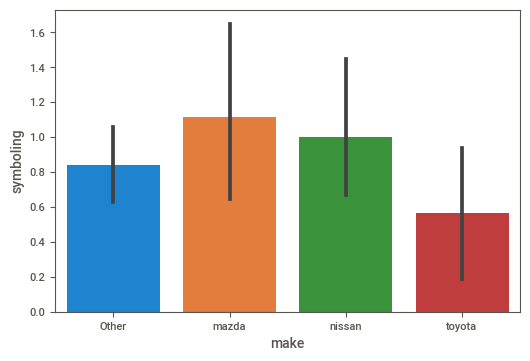

In [19]:
sns.barplot(x='make',y='symboling',data=data)
plt.show()

#### Observation:-
* Most symboling risk in mazada brand cars

### Multivariate Analysis

In [20]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3.0,NaN,Other,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,four,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,3.0,NaN,Other,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,four,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,1.0,NaN,Other,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823.0,ohcv,six,152.0,mpfi,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,2.0,164.0,Other,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337.0,ohc,four,109.0,mpfi,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,2.0,164.0,Other,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824.0,ohc,five,136.0,mpfi,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


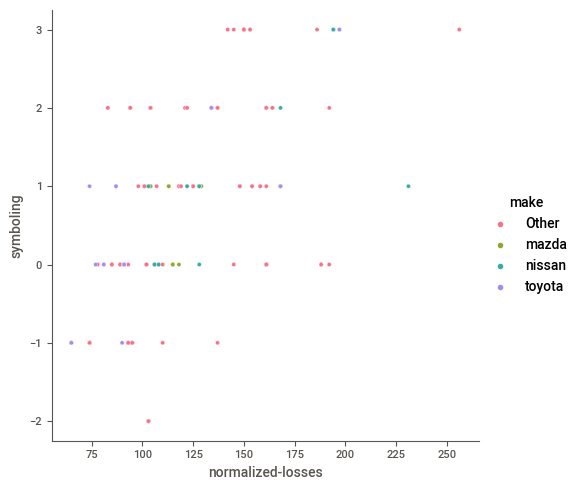

In [21]:
### cheacking relationship with normalize-losses & symboling with make.
sns.relplot(x='normalized-losses',y='symboling',data=data,hue='make',palette='husl')
plt.show()

#### Observation:-
* Minimum toyota,mazda and some other cars has less symboling risk than other.  

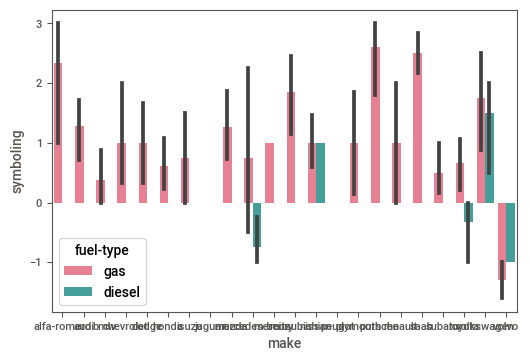

In [17]:
### cheacking relationship with make & symboling with fuel-type.
sns.barplot(x='make',y='symboling',data=data,hue='fuel-type',palette='husl')
plt.show()

#### Observation:-
* Toyota diesel fuel-type car has less symbolic risk as well as toyota gas fuel-type car more risk.
* nisan, mazda, and other both fuel-type car more symbolic risk.

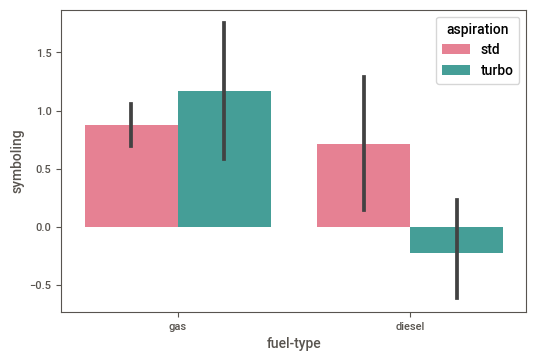

In [18]:
### cheacking relationship with fuel-type & symboling with aspiration.
sns.barplot(x='fuel-type',y='symboling',data=data,hue='aspiration',palette='husl')
plt.show()

#### Observation:-
* diesel turbo aspiration engine more safe than std
* gas turbo & std aspiration engine more risky.

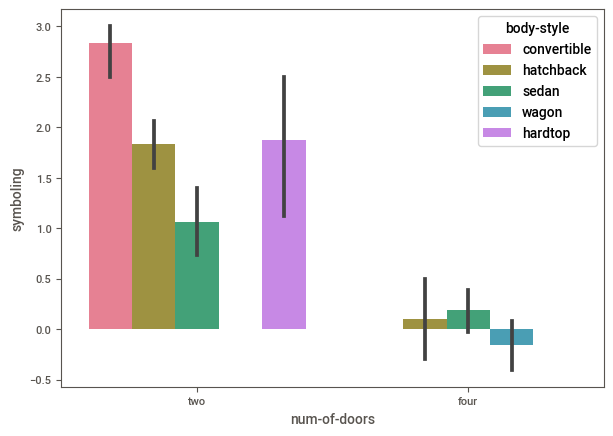

In [19]:
### cheacking relationship with num-of-doors & symboling with body-style .
plt.figure(figsize=(7,5))
sns.barplot(x='num-of-doors',y='symboling',data=data,hue='body-style',palette='husl')
plt.show()

#### Observation:-
* Four doors hatchback,sedan,wagon body-style cars more safe.
* Two doors all body style cars more risky.

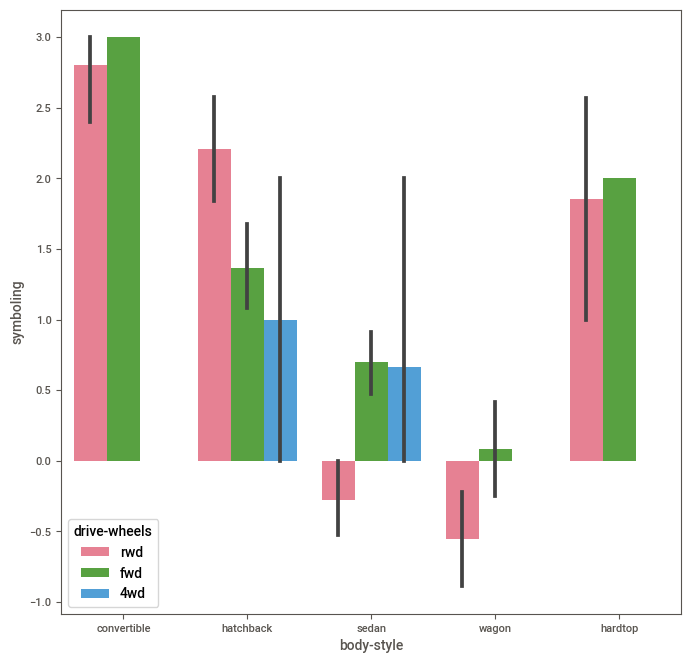

In [20]:
### cheacking relationship with body-style & symboling with drive-wheels .
plt.figure(figsize=(8,8))
sns.barplot(x='body-style',y='symboling',data=data,hue='drive-wheels',palette='husl')
plt.show()

#### Observation:-
* wagon,sedan body-style with rwd(rare-wheel drive) cars less symboling.& other body-style as well as drive wheels cars more symboling 

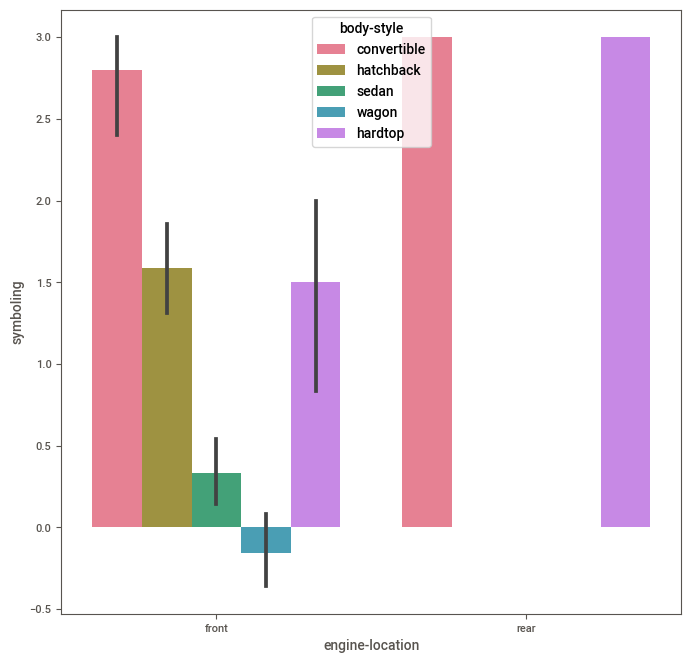

In [21]:
### cheacking relationship with engine-location & symboling with body-style.
plt.figure(figsize=(8,8))
sns.barplot(x='engine-location',y='symboling',data=data,hue='body-style',palette='husl')
plt.show()

#### Observation:-
* wagon & sedan front engine are less symboling and other body-style and front & rare engine location cars more symboling.

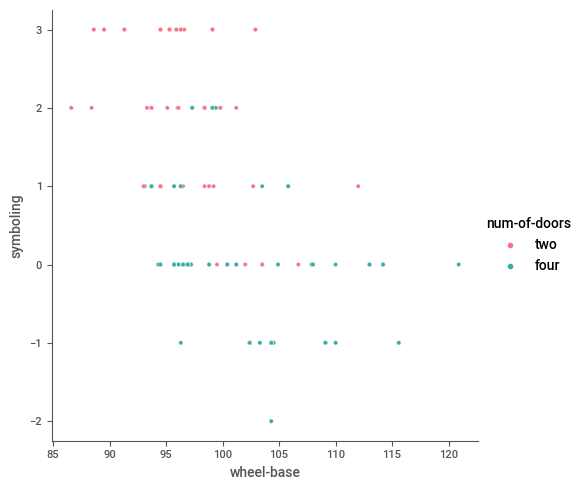

In [22]:
### cheacking relationship with wheel-base & symboling with body-style.
sns.relplot(x='wheel-base',y='symboling',data=data,hue='num-of-doors',palette='husl')
plt.show()

#### Observation:-
* Most of the four doors and wheel base range between 95 to 120 cars less symboling and two doors cars with minimum wheel-base cars more symboling

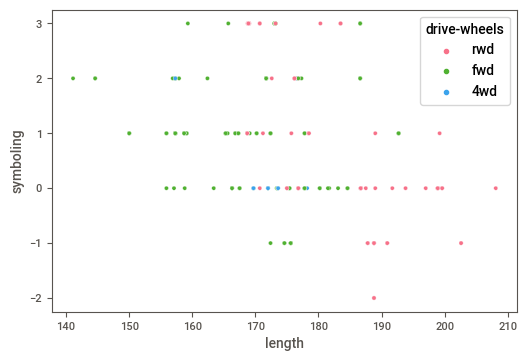

In [23]:
### cheacking relationship with length & symboling with body-style.
sns.scatterplot(x='length',y='symboling',data=data,hue='drive-wheels',palette='husl')
plt.show()

#### Observation:-
* Maximum lenght with rwd minimum cars has less symboling.

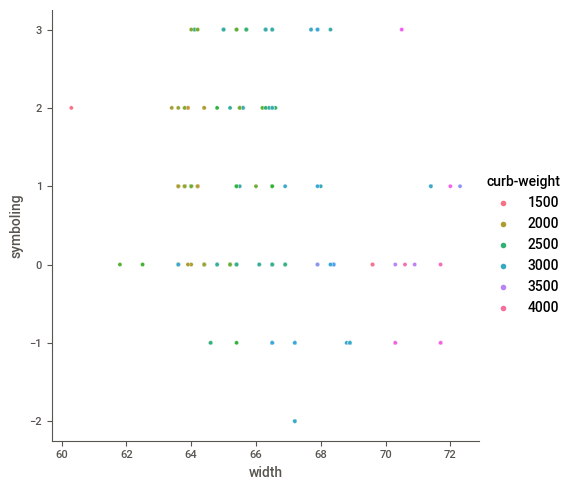

In [24]:
### cheacking relationship with width & symboling with curb-weight.
sns.relplot(x='width',y='symboling',data=data,hue='curb-weight',palette='husl')
plt.show()

#### Observation:-
* Thier is no relationship with width & symboling

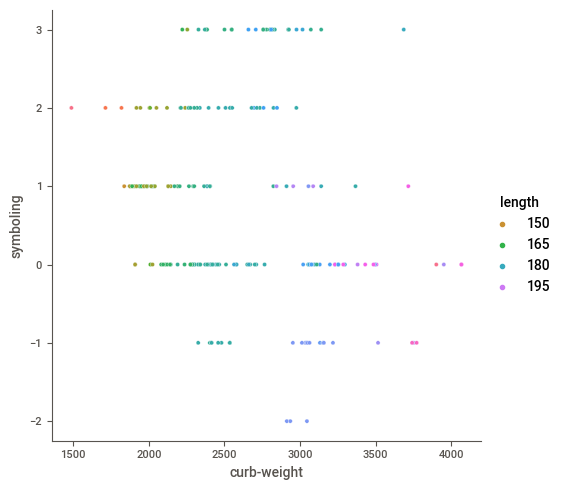

In [25]:
### cheacking relationship with curb-weight & symboling with lenght.
sns.relplot(x='curb-weight',y='symboling',data=data,hue='length',palette='husl')
plt.show()

##### Observation:-
* Minimum curb-weight & length cars more symboling

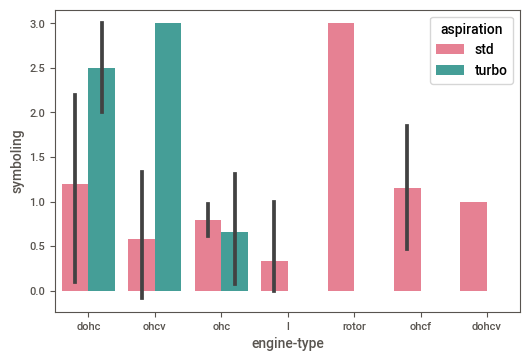

In [26]:
### cheacking relationship with engine-type & symboling with num-of-aspiration.
sns.barplot(x='engine-type',y='symboling',data=data,hue='aspiration',palette='husl')
plt.show()

##### Observation:-
* All type of engine and aspiration symboling range between 0.0 to 3.0

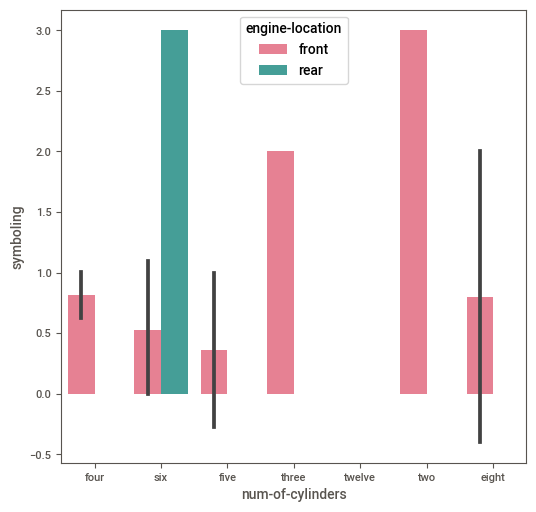

In [27]:
### cheacking relationship with num-of-cylinders & symboling with aspiration.
plt.figure(figsize=(6,6))
sns.barplot(x='num-of-cylinders',y='symboling',data=data,hue='engine-location',palette='husl')
plt.show()

##### Observation:-
* Almost all cylinder and front & rare engine symboling is more than 0

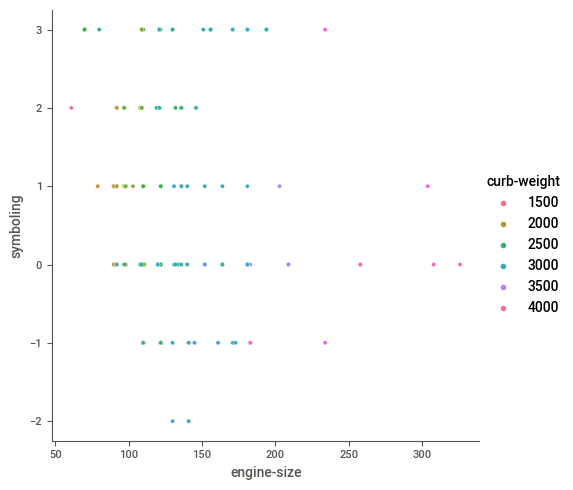

In [28]:
### cheacking relationship with engine-size & symboling with curb-weight.
sns.relplot(x='engine-size',y='symboling',data=data,hue='curb-weight',palette='husl')
plt.show()

##### Observation:-
* No relation find between engine-size, curb-weight with symboling

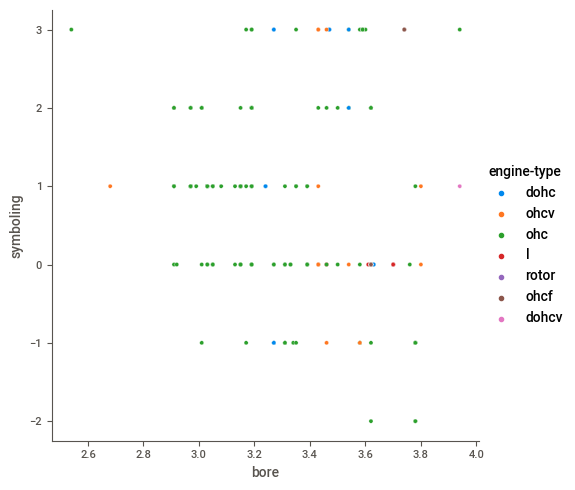

In [30]:
### cheacking relationship with bore & symboling with engine-type.
sns.relplot(x='bore',y='symboling',data=data,hue='engine-type')
plt.show()

##### Observation:-
* ohc engine-type cars with bore symboling is low as well as high

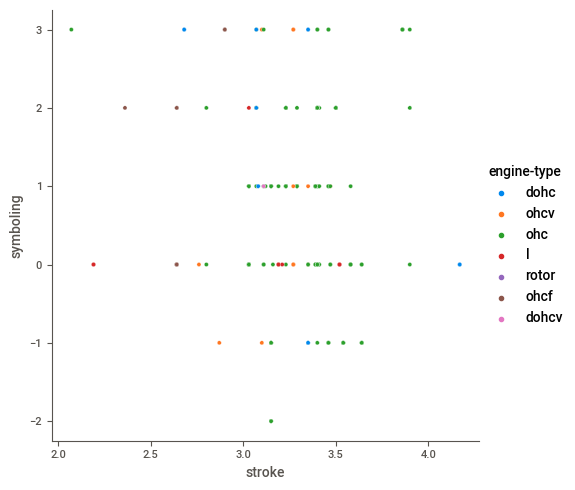

In [33]:
### cheacking relationship with stroke & symboling with engine-type.
sns.relplot(x='stroke',y='symboling',data=data,hue='engine-type')
plt.show()

##### Observation:-
* ohc engine-type cars with stroke in engine. symboling is low as well as high

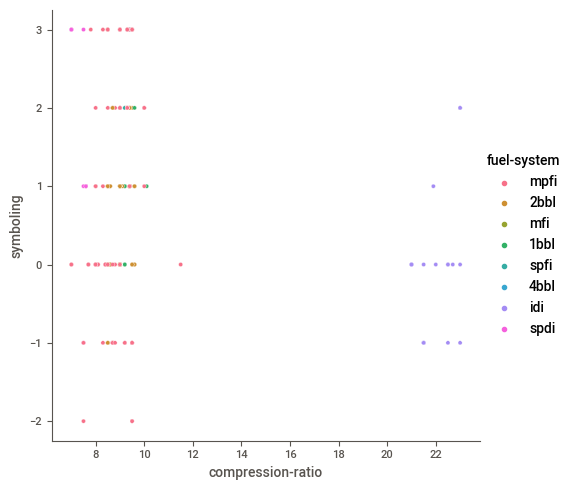

In [34]:
### cheacking relationship with compression-ratio & symboling with fuel-system.
sns.relplot(x='compression-ratio',y='symboling',data=data,hue='fuel-system',palette='husl')
plt.show()

##### Observation:-
* mpfi,2bbl,mfi,1bbl,spi,4bbl,spodi fuel system engine are less compression ratio but symboling chance is high or low.
* idi fuel-system engine more compression ratio and maximum range of symboling is 0 to -1.

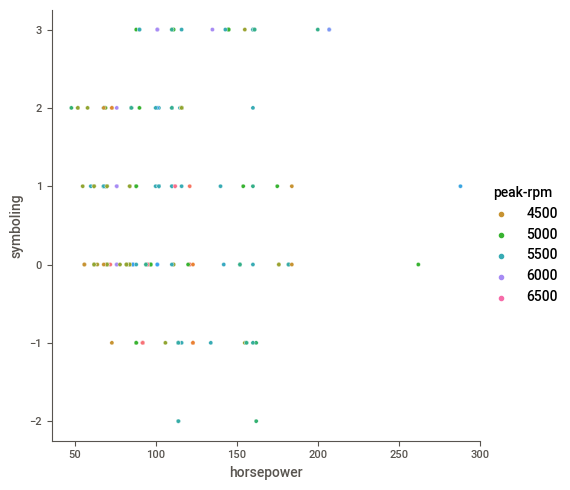

In [35]:
### cheacking relationship with horsepower & symboling with fuel-stroke.
sns.relplot(x='horsepower',y='symboling',data=data,hue='peak-rpm',palette='husl')
plt.show()

##### Observation:-
* Minimum horsepower and peak-rpm range between 4500 to 6500 has more syboling.

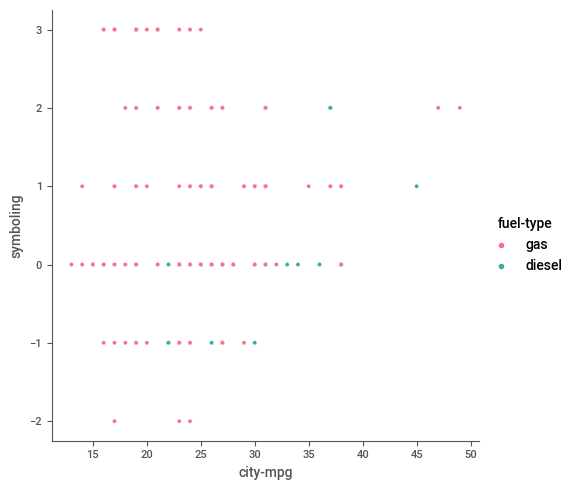

In [36]:
### cheacking relationship with city-mpg & symboling with fuel-system.
sns.relplot(x='city-mpg',y='symboling',data=data,hue='fuel-type',palette='husl')
plt.show()

##### Observation:-
* Most of the gas fuel and less city-mpg cars symboling range between 0 to 3.

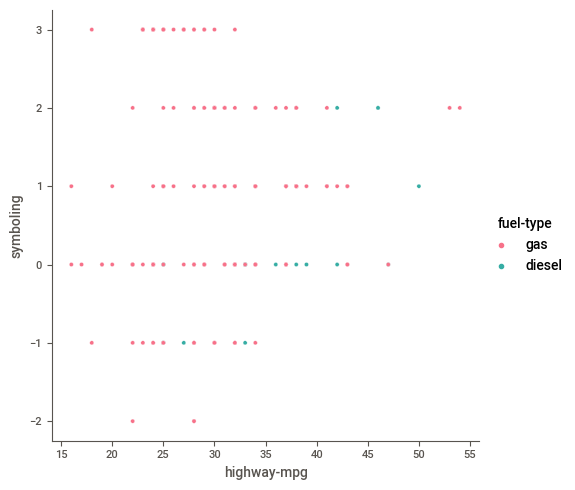

In [37]:
### cheacking relationship with highway-mpg & symboling with fuel-system.
sns.relplot(x='highway-mpg',y='symboling',data=data,hue='fuel-type',palette='husl')
plt.show()

##### Observation:-
* Most of the gas fuel and less city-mpg cars symboling range between 0 to 3 as well as minimum cars of gas fuel give -1,-2 symboling

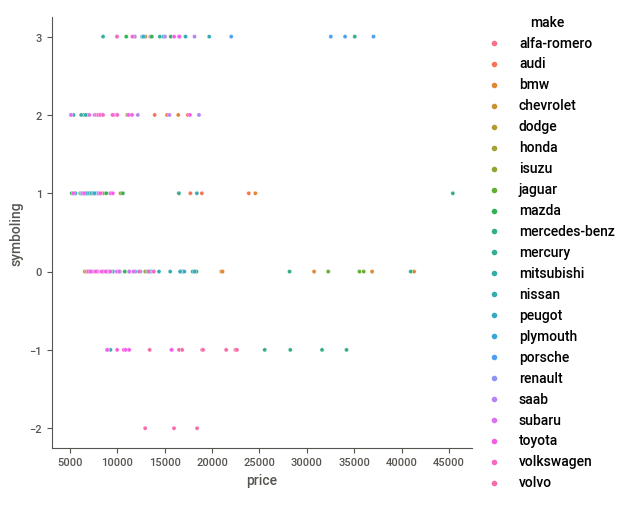

In [38]:
### cheacking relationship with price & symboling with make.
sns.relplot(x='price',y='symboling',data=data,hue='make',palette='husl')
plt.show()

##### Observation:-
* Every price and brand cars has been less or high symboling.

## Feature engineering / Data preprocessing
##### step to perform feature engineering & data preprocessing
* cheack missing value
* imputing the missing value
* convert categorical to numerical
* handling outlier


In [39]:
data.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

* seven features are missing value

In [40]:
#### cheacking the distribution
## continous veriable
df = data[['wheel-base','length','width','height','curb-weight',
              'engine-size','compression-ratio','city-mpg','highway-mpg',
              'normalized-losses','bore','stroke','horsepower','peak-rpm','price']]

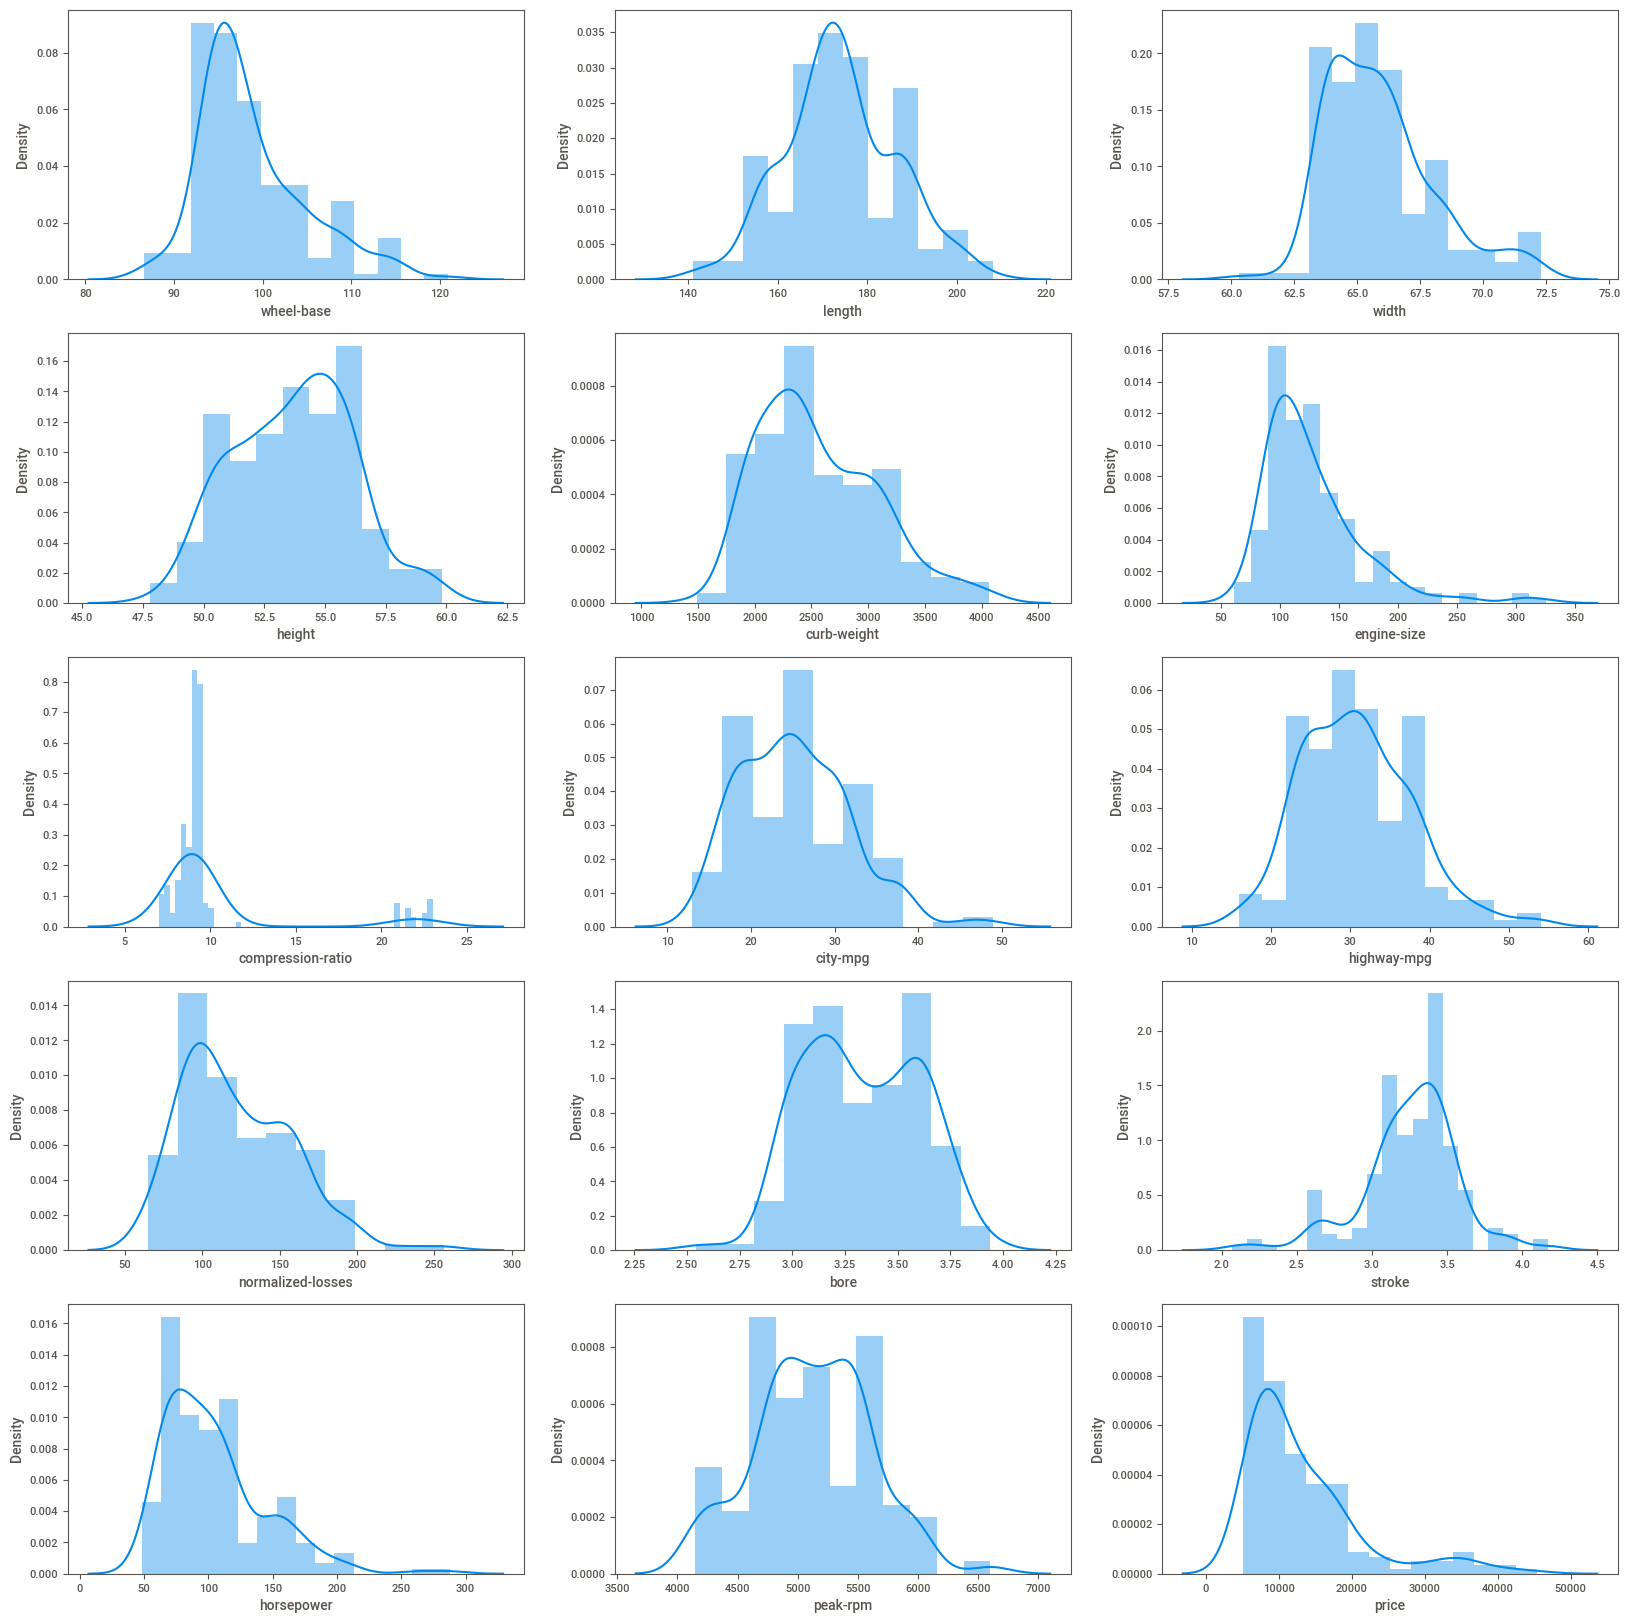

In [24]:
plt.figure(figsize=(20,25))
plotno=1 

for column in df:
    if plotno<20:
        plt.subplot(6,3,plotno)
        sns.distplot(df[column])
        plotno+=1

In [41]:
#### Imputing missing value:-
data.loc[data['normalized-losses'].isnull()==True,'normalized-losses']=data['normalized-losses'].mean()
data.loc[data['bore'].isnull()==True,'bore']=data['bore'].mean()
data.loc[data['stroke'].isnull()==True,'stroke']=data['stroke'].mean()
data.loc[data['horsepower'].isnull()==True,'horsepower']=data['horsepower'].mean()
data.loc[data['peak-rpm'].isnull()==True,'peak-rpm']=data['peak-rpm'].mean()
data.loc[data['price'].isnull()==True,'price']=data['price'].mean()



In [42]:
#### handling categorical missing value
data.value_counts('num-of-doors')

num-of-doors
four    114
two      89
dtype: int64

In [43]:
## replacing most freqant sring
data['num-of-doors'] = data['num-of-doors'].replace(np.nan,'four')

In [44]:
data.isnull().sum() ## check missing value after imputing

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [45]:
data.value_counts('num-of-doors') ## cheacking the counts of doors after imputing

num-of-doors
four    116
two      89
dtype: int64

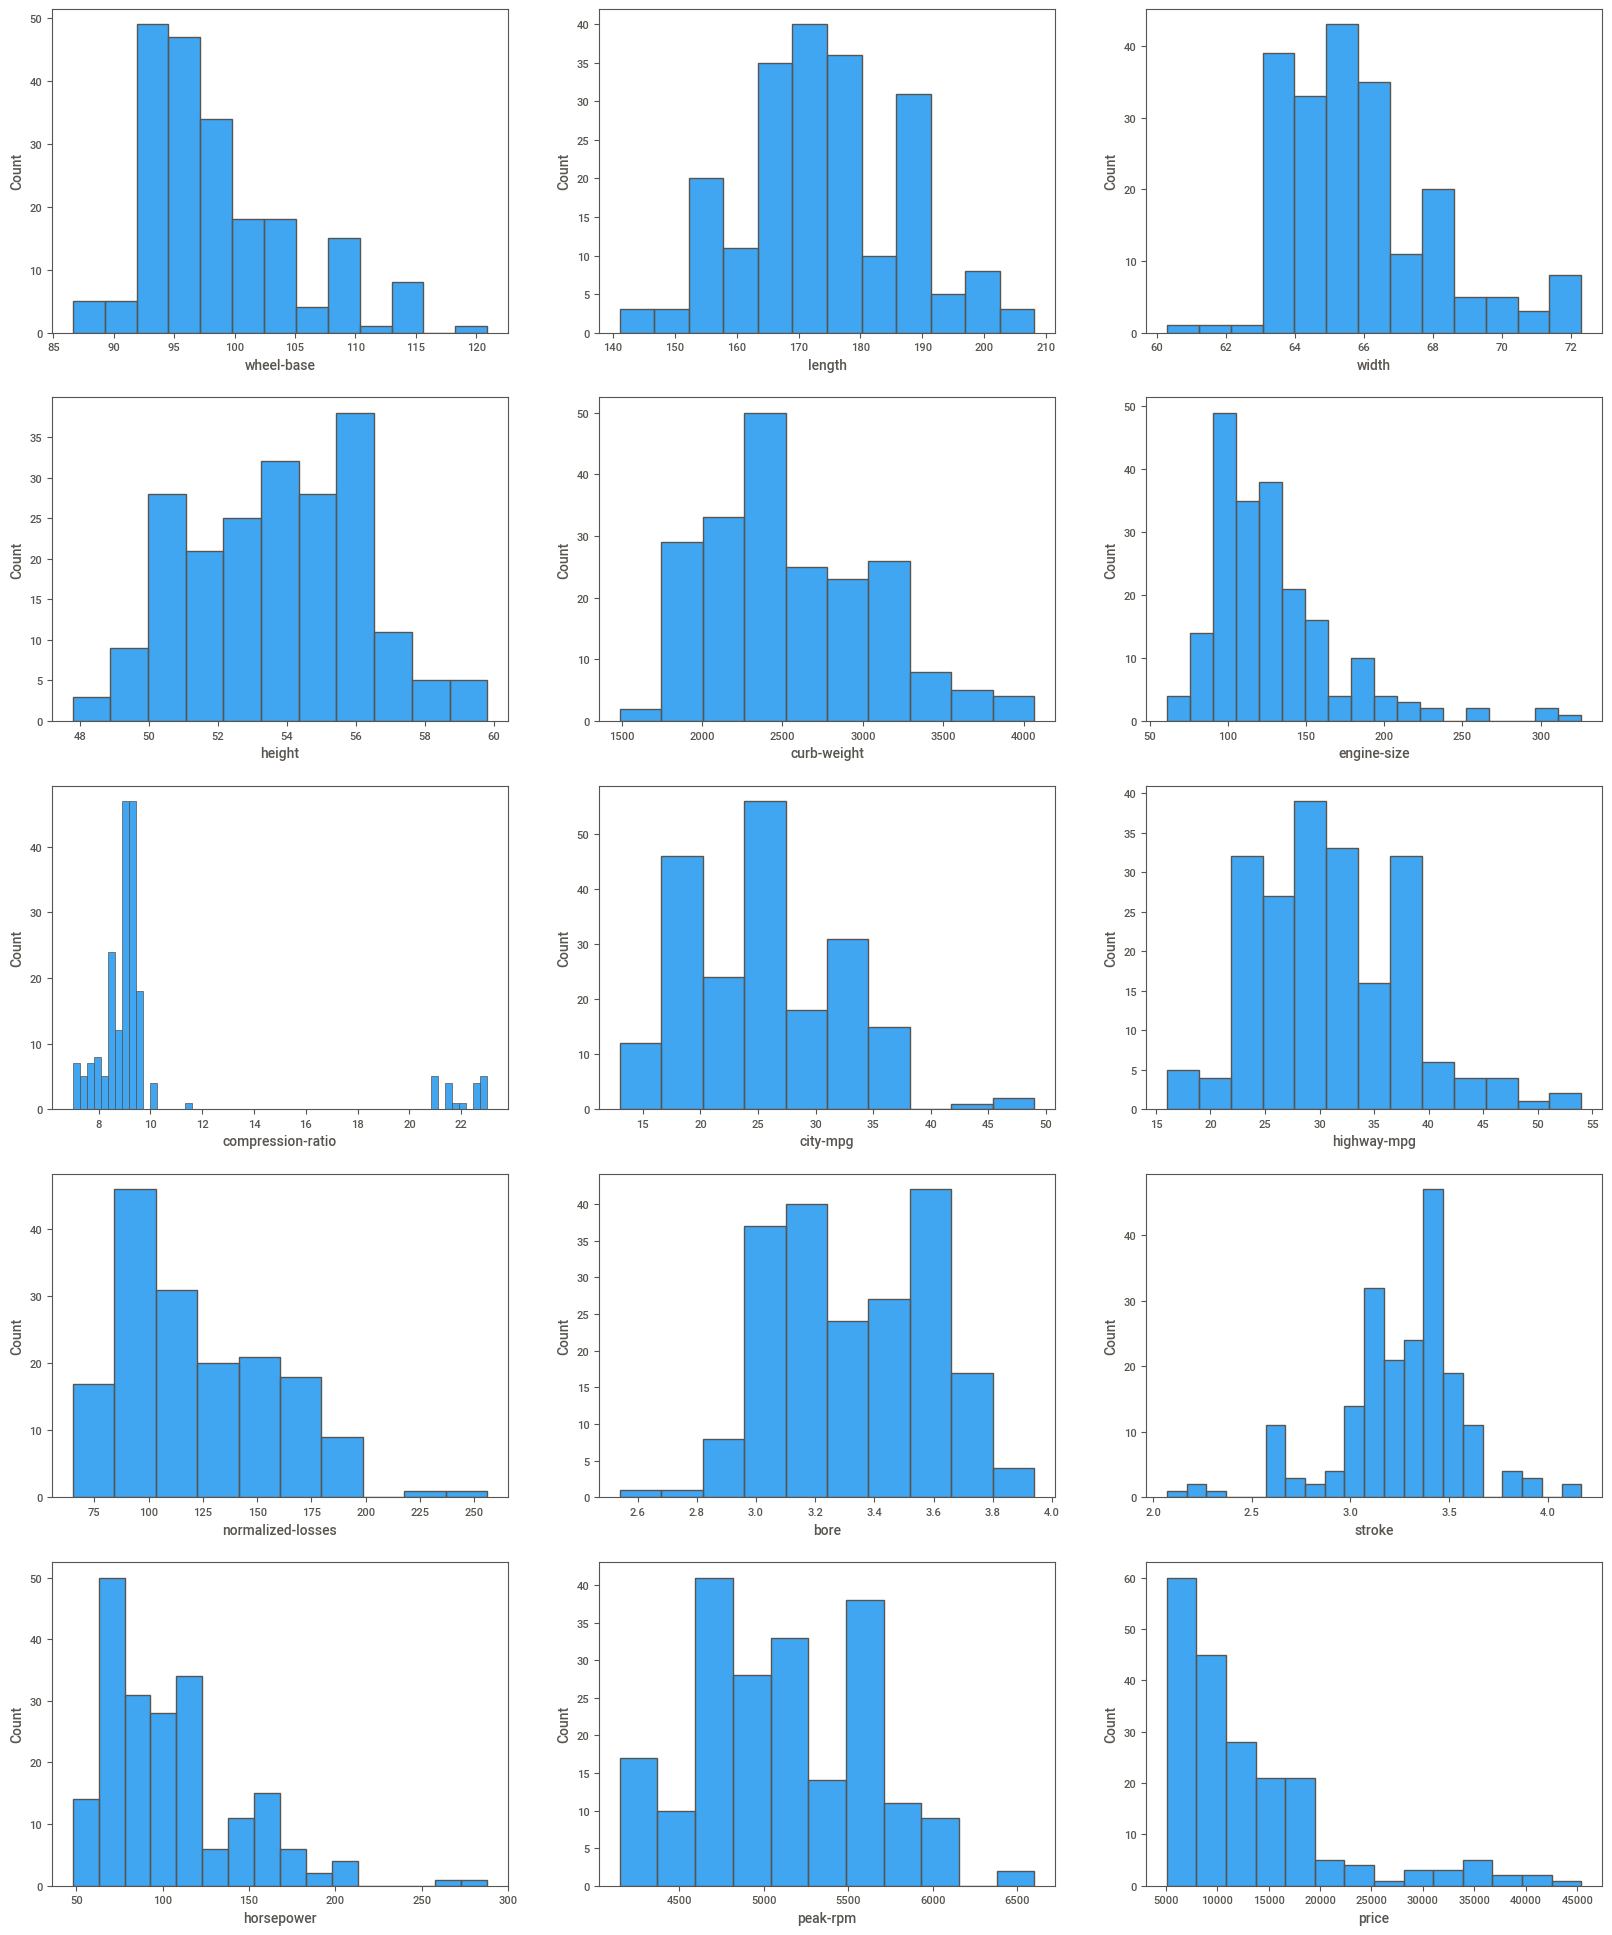

In [30]:
#### checking the distribution
plt.figure(figsize=(20,30))
plotno=1 

for column in df:
    if plotno<20:
        plt.subplot(6,3,plotno)
        sns.histplot(df[column])
        plotno+=1

## feature selection


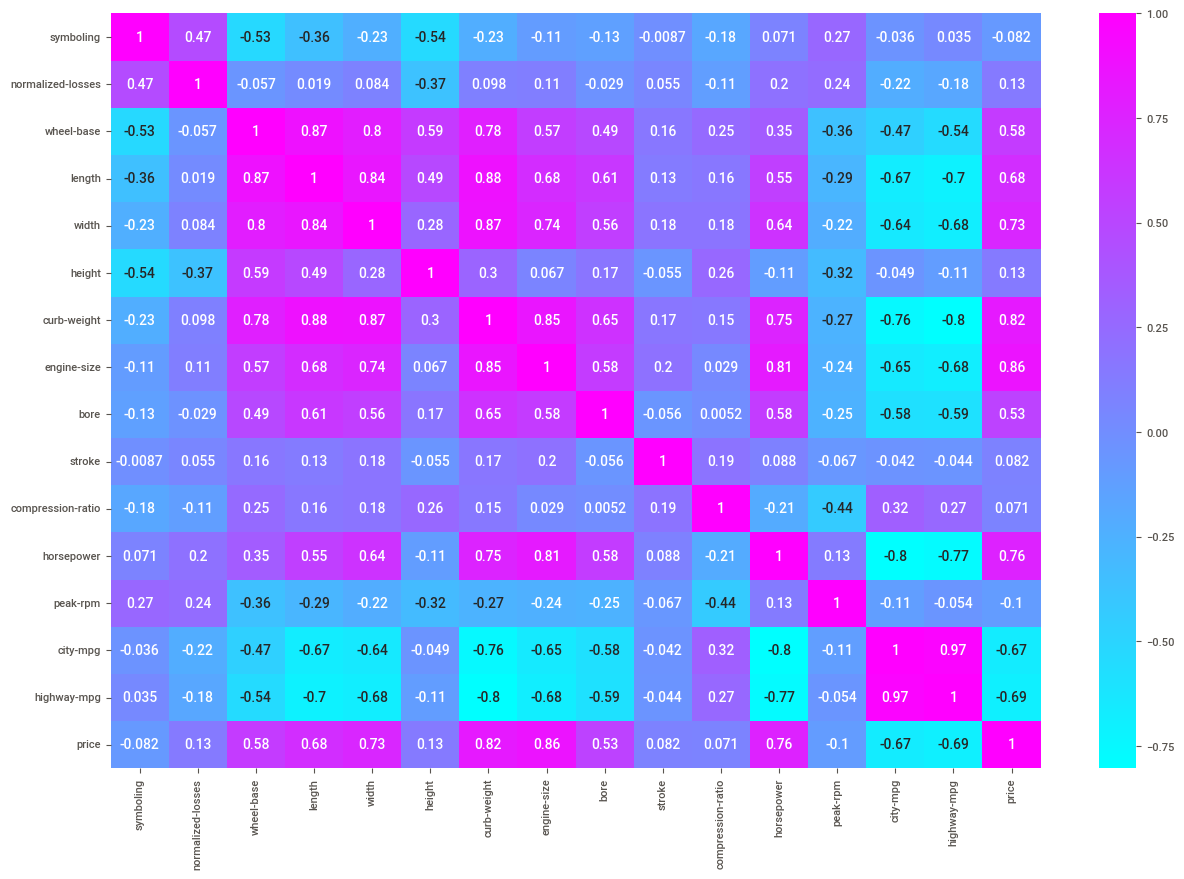

In [31]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,cmap='cool')
plt.show()

##### Observation:-
* city-mpg is highly corelated with highway-mapg

In [46]:
###dropping the column
data.drop('city-mpg',axis=1,inplace=True)

In [47]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,highway-mpg,price
0,3.0,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,four,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,27.0,13495.0
1,3.0,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,four,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,27.0,16500.0
2,1.0,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823.0,ohcv,six,152.0,mpfi,2.68,3.47,9.0,154.0,5000.0,26.0,16500.0
3,2.0,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337.0,ohc,four,109.0,mpfi,3.19,3.40,10.0,102.0,5500.0,30.0,13950.0
4,2.0,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824.0,ohc,five,136.0,mpfi,3.19,3.40,8.0,115.0,5500.0,22.0,17450.0


### Handling categorical data

In [48]:
#### transfer categorical data to numerical data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    float64
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    float64
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [49]:
df2 = pd.get_dummies(data['make'],prefix='make',drop_first=True)
data = pd.concat([df2,data],axis=1).drop(['make'],axis=1)

In [50]:
df3 = pd.get_dummies(data['fuel-type'],prefix='fuel-type',drop_first=True)
data = pd.concat([df3,data],axis=1).drop(['fuel-type'],axis=1)

In [51]:
df4 = pd.get_dummies(data['aspiration'],prefix='aspiration',drop_first=True)
data = pd.concat([df4,data],axis=1).drop(['aspiration'],axis=1)

In [52]:
df5 = pd.get_dummies(data['num-of-doors'],prefix='num-of-doors',drop_first=True)
data = pd.concat([df5,data],axis=1).drop(['num-of-doors'],axis=1)

In [53]:
df6 = pd.get_dummies(data['body-style'],prefix='body-style',drop_first=True)
data = pd.concat([df6,data],axis=1).drop(['body-style'],axis=1)

In [54]:
df7 = pd.get_dummies(data['drive-wheels'],prefix='drive-wheels',drop_first=True)
data = pd.concat([df7,data],axis=1).drop(['drive-wheels'],axis=1)

In [55]:
df8 = pd.get_dummies(data['engine-location'],prefix='engine-location',drop_first=True)
data = pd.concat([df8,data],axis=1).drop(['engine-location'],axis=1)

In [56]:
df9 = pd.get_dummies(data['engine-type'],prefix='engine-type',drop_first=True)
data = pd.concat([df9,data],axis=1).drop(['engine-type'],axis=1)

In [57]:
df10 = pd.get_dummies(data['num-of-cylinders'],prefix='num-of-cylinders',drop_first=True)
data = pd.concat([df10,data],axis=1).drop(['num-of-cylinders'],axis=1)

In [58]:
df11 = pd.get_dummies(data['fuel-system'],prefix='fuel-system',drop_first=True)
data = pd.concat([df11,data],axis=1).drop(['fuel-system'],axis=1)

In [59]:
data.head()

,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi,num-of-cylinders_five,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_three,num-of-cylinders_twelve,num-of-cylinders_two,engine-type_dohcv,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,engine-location_rear,drive-wheels_fwd,drive-wheels_rwd,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,num-of-doors_two,aspiration_turbo,fuel-type_gas,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,highway-mpg,price
0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,27.0,13495.0
1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,27.0,16500.0
2,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,122.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,26.0,16500.0
3,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,30.0,13950.0
4,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,22.0,17450.0


## Model Creation

In [60]:
data

,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi,num-of-cylinders_five,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_three,num-of-cylinders_twelve,num-of-cylinders_two,engine-type_dohcv,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,engine-location_rear,drive-wheels_fwd,drive-wheels_rwd,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,num-of-doors_two,aspiration_turbo,fuel-type_gas,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,highway-mpg,price
0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,27.0,13495.0
1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,27.0,16500.0
2,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,122.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,26.0,16500.0
3,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,30.0,13950.0
4,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,22.0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-1.0,95.0,109.1,188.8,68.9,55.5,2952.0,141.0,3.78,3.15,9.5,114.0,5400.0,28.0,16845.0
201,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-1.0,95.0,109.1,188.8,68.8,55.5,3049.0,141.0,3.78,3.15,8.7,160.0,5300.0,25.0,19045.0
202,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-1.0,95.0,109.1,188.8,68.9,55.5,3012.0,173.0,3.58,2.87,8.8,134.0,5500.0,23.0,21485.0
203,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-1.0,95.0,109.1,188.8,68.9,55.5,3217.0,145.0,3.01,3.40,23.0,106.0,4800.0,27.0,22470.0


In [84]:
#### defining X and y 
X = data.drop(columns=['symboling']) ### facing issue 
y = data['symboling']

In [85]:
X ## checking column drop or not

,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi,num-of-cylinders_five,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_three,num-of-cylinders_twelve,num-of-cylinders_two,engine-type_dohcv,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,engine-location_rear,drive-wheels_fwd,drive-wheels_rwd,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,num-of-doors_two,aspiration_turbo,fuel-type_gas,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,highway-mpg,price
0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,27.0,13495.0
1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,27.0,16500.0
2,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,122.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,26.0,16500.0
3,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,30.0,13950.0
4,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,22.0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,95.0,109.1,188.8,68.9,55.5,2952.0,141.0,3.78,3.15,9.5,114.0,5400.0,28.0,16845.0
201,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,95.0,109.1,188.8,68.8,55.5,3049.0,141.0,3.78,3.15,8.7,160.0,5300.0,25.0,19045.0
202,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,95.0,109.1,188.8,68.9,55.5,3012.0,173.0,3.58,2.87,8.8,134.0,5500.0,23.0,21485.0
203,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,95.0,109.1,188.8,68.9,55.5,3217.0,145.0,3.01,3.40,23.0,106.0,4800.0,27.0,22470.0


In [86]:
### create trainin and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [87]:
X_train

,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi,num-of-cylinders_five,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_three,num-of-cylinders_twelve,num-of-cylinders_two,engine-type_dohcv,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,engine-location_rear,drive-wheels_fwd,drive-wheels_rwd,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,num-of-doors_two,aspiration_turbo,fuel-type_gas,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,highway-mpg,price
90,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,128.0,94.5,165.3,63.8,54.5,2017.0,103.0,2.99,3.47,21.9,55.0,4800.0,50.0,7099.0
173,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,65.0,102.4,175.6,66.5,54.9,2326.0,122.0,3.31,3.54,8.7,92.0,4200.0,34.0,8948.0
93,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,103.0,94.5,170.2,63.8,53.5,2024.0,97.0,3.15,3.29,9.4,69.0,5200.0,37.0,7349.0
5,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,122.0,99.8,177.3,66.3,53.1,2507.0,136.0,3.19,3.40,8.5,110.0,5500.0,25.0,15250.0
167,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,134.0,98.4,176.2,65.6,52.0,2540.0,146.0,3.62,3.50,9.3,116.0,4800.0,30.0,8449.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,231.0,99.2,178.5,67.9,49.7,3139.0,181.0,3.43,3.27,9.0,160.0,5200.0,25.0,18399.0
14,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,122.0,103.5,189.0,66.9,55.7,3055.0,164.0,3.31,3.19,9.0,121.0,4250.0,25.0,24565.0
92,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,122.0,94.5,165.3,63.8,54.5,1938.0,97.0,3.15,3.29,9.4,69.0,5200.0,37.0,6849.0
179,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,197.0,102.9,183.5,67.7,52.0,3016.0,171.0,3.27,3.35,9.3,161.0,5200.0,24.0,15998.0


In [88]:
X_test.head()

,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi,num-of-cylinders_five,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_three,num-of-cylinders_twelve,num-of-cylinders_two,engine-type_dohcv,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,engine-location_rear,drive-wheels_fwd,drive-wheels_rwd,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,num-of-doors_two,aspiration_turbo,fuel-type_gas,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,highway-mpg,price
15,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,122.0,103.5,189.0,66.9,55.7,3230.0,209.0,3.62,3.39,8.00,182.0,5400.0,22.0,30760.000000
9,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,122.0,99.5,178.2,67.9,52.0,3053.0,131.0,3.13,3.40,7.00,160.0,5500.0,22.0,13207.129353
100,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,106.0,97.2,173.4,65.2,54.7,2302.0,120.0,3.33,3.47,8.50,97.0,5200.0,34.0,9549.000000
132,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,150.0,99.1,186.6,66.5,56.1,2658.0,121.0,3.54,3.07,9.31,110.0,5250.0,28.0,11850.000000
68,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,93.0,110.0,190.9,70.3,58.7,3750.0,183.0,3.58,3.64,21.50,123.0,4350.0,25.0,28248.000000


In [89]:
y_train

90     1.0
173   -1.0
93     1.0
5      2.0
167    2.0
      ... 
106    1.0
14     1.0
92     1.0
179    3.0
102    0.0
Name: symboling, Length: 153, dtype: float64

In [90]:
y_test.head()

15     0.0
9      0.0
100    0.0
132    3.0
68    -1.0
Name: symboling, dtype: float64

In [91]:
#### scaling the data
#### make sure to all continous fature same magnitude

In [92]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

scaling_data = X_train[['normalized-losses','wheel-base','length','width','height','curb-weight',
                        'engine-size','bore','stroke','compression-ratio','horsepower','peak-rpm',
                        'highway-mpg','price']]
X_train[['normalized-losses','wheel-base','length','width','height','curb-weight',
          'engine-size','bore','stroke','compression-ratio','horsepower','peak-rpm',
         'highway-mpg','price']]=scalar.fit_transform(scaling_data)


In [93]:
X_train.head()

,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi,num-of-cylinders_five,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_three,num-of-cylinders_twelve,num-of-cylinders_two,engine-type_dohcv,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,engine-location_rear,drive-wheels_fwd,drive-wheels_rwd,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,num-of-doors_two,aspiration_turbo,fuel-type_gas,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,highway-mpg,price
90,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.148796,-0.704615,-0.750156,-1.011226,0.324924,-1.062582,-0.581434,-1.226462,0.700627,3.178014,-1.259142,-0.731306,3.069127,-0.798809
173,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-1.786757,0.616005,0.101982,0.256951,0.487519,-0.459802,-0.118738,-0.042541,0.930917,-0.350686,-0.343948,-1.959723,0.563884,-0.559715
93,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,-0.619281,-0.704615,-0.344770,-1.011226,-0.081563,-1.048927,-0.727548,-0.634501,0.108452,-0.163558,-0.912852,0.087639,1.033617,-0.766481
5,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.035542,0.181371,0.242626,0.163012,-0.244158,-0.106717,0.222196,-0.486511,0.470337,-0.404151,0.101282,0.701847,-0.845315,0.255195
167,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.333134,-0.052663,0.151621,-0.165775,-0.691295,-0.042343,0.465720,1.104382,0.799323,-0.190290,0.249692,-0.731306,-0.062426,-0.624241


In [94]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(multi_class='ovr')
lr.fit(X_train,y_train)

LogisticRegression(multi_class='ovr')

In [95]:
scaling_data = X_test[['normalized-losses','wheel-base','length','width','height','curb-weight',
                        'engine-size','bore','stroke','compression-ratio','horsepower','peak-rpm',
                        'highway-mpg','price']]

X_test[['normalized-losses','wheel-base','length','width','height','curb-weight',
          'engine-size','bore','stroke','compression-ratio','horsepower','peak-rpm',
         'highway-mpg','price']]=scalar.transform(scaling_data)


In [96]:
X_test.head()

,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi,num-of-cylinders_five,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_three,num-of-cylinders_twelve,num-of-cylinders_two,engine-type_dohcv,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,engine-location_rear,drive-wheels_fwd,drive-wheels_rwd,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,num-of-doors_two,aspiration_turbo,fuel-type_gas,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,highway-mpg,price
15,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.035542,0.799889,1.210588,0.444829,0.812709,1.303671,1.999922,1.104382,0.437438,-0.537814,1.882201,0.497111,-1.315048,2.260788
9,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.035542,0.131221,0.317084,0.914524,-0.691295,0.958389,0.100434,-0.708496,0.470337,-0.805140,1.338032,0.701847,-1.315048,-0.008968
100,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,-0.527111,-0.253264,-0.080028,-0.353653,0.406222,-0.506620,-0.167443,0.031454,0.700627,-0.404151,-0.220273,0.087639,0.563884,-0.482000
132,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.824704,0.064354,1.012031,0.256951,0.975304,0.187845,-0.143090,0.808402,-0.615317,-0.187617,0.101282,0.190007,-0.375582,-0.184458
68,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,-0.926511,1.886475,1.367778,2.041791,2.032172,2.318058,1.366759,0.956392,1.259904,3.071083,0.422837,-1.652619,-0.845315,1.935962


In [97]:
y_predict = lr.predict(X_test)

In [98]:
y_predict

array([ 0.,  1.,  1.,  2., -1.,  1.,  0.,  0.,  0.,  2.,  2.,  1.,  0.,
       -1., -1.,  0.,  1.,  3.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,
        2., -1.,  1., -1., -1.,  1.,  0., -1.,  3., -1.,  0.,  3.,  1.,
        3.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  2.,  0.,  3.,  1.,  3.])

In [99]:
pd.crosstab(y_test,y_predict)

col_0,-1.0,0.0,1.0,2.0,3.0
symboling,,,,,
-2.0,1,0,0,0,0
-1.0,5,0,0,0,0
0.0,2,16,4,1,0
1.0,0,2,8,0,1
2.0,0,0,3,3,0
3.0,0,0,0,1,5


In [100]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,classification_report

In [101]:
accuracy = accuracy_score(y_test,y_predict) ### total no of correct classification / total no of classification
accuracy

0.7115384615384616

In [102]:
recall = recall_score(y_test,y_predict,average='weighted') ### total no of positive result/positive result predicted by model
recall

0.7115384615384616

In [103]:
precision = precision_score(y_test,y_predict,average='weighted') ### postive prediction/actual postive prdiction
precision

0.7314636752136752

In [104]:
f1_score = f1_score(y_test,y_predict,average='weighted') ## harmonic mean of recall & precision
f1_score

0.7084486807751348

In [105]:
report = classification_report(y_test,y_predict)
print(report)

              precision    recall  f1-score   support

        -2.0       0.00      0.00      0.00         1
        -1.0       0.62      1.00      0.77         5
         0.0       0.89      0.70      0.78        23
         1.0       0.53      0.73      0.62        11
         2.0       0.60      0.50      0.55         6
         3.0       0.83      0.83      0.83         6

    accuracy                           0.71        52
   macro avg       0.58      0.63      0.59        52
weighted avg       0.73      0.71      0.71        52

